C:\Users\woute\AppData\Local\Temp\ipykernel_4720\3723010128.py:27: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, 0, t)


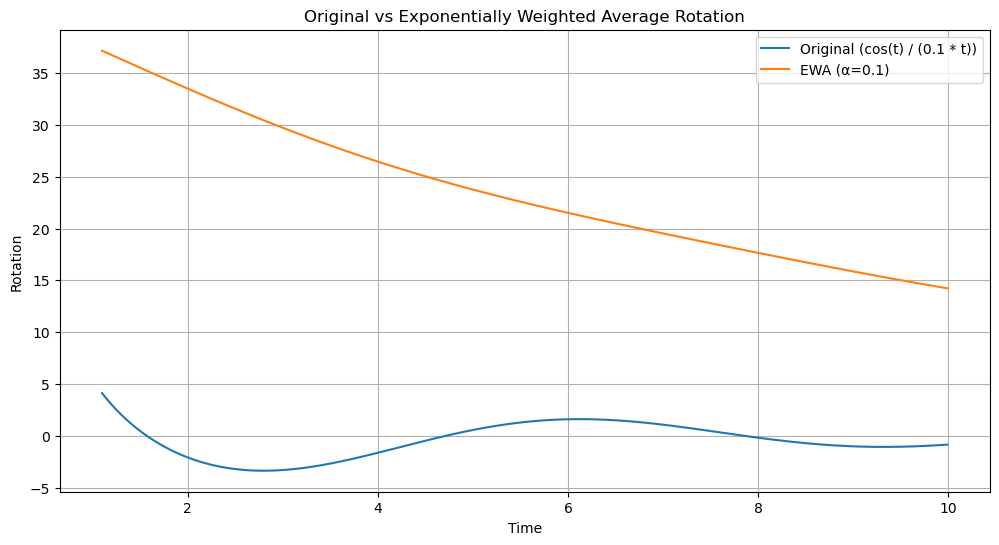

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def original_rotation(t):
    """Original rotation function with cos(t) / (0.1 * t)"""
    return np.cos(t) / (0.1 * t) if t != 0 else 1

def ewa_rotation(t, alpha=0.5):
    """
    Analytical approximation of exponential weighted average of cos(t) / (0.1 * t)
    
    Args:
        t: time
        alpha: smoothing factor (0 < alpha < 1)
    
    Returns:
        Smoothed rotation value
    """
    if t == 0:
        return 1
    
    # Integrate cos(s) / (0.1 * s) weighted by exp(-alpha * (t - s)) from 0 to t
    def integrand(s):
        return alpha * np.exp(-alpha * (t - s)) * (np.cos(s) / (0.1 * s) if s != 0 else 1)
    
    result, _ = quad(integrand, 0, t)
    return result

# Visualize the functions
def plot_comparison(t_max=10, alpha=0.1):
    t = np.arange(1.1, t_max, 0.01)
    
    original = np.array([original_rotation(i) for i in t])
    smoothed = np.array([ewa_rotation(i, alpha) for i in t])
    
    plt.figure(figsize=(12, 6))
    plt.plot(t, original, label='Original (cos(t) / (0.1 * t))')
    plt.plot(t, smoothed, label=f'EWA (α={alpha})')
    plt.xlabel('Time')
    plt.ylabel('Rotation')
    plt.title('Original vs Exponentially Weighted Average Rotation')
    plt.legend()
    plt.grid(True)
    plt.show()

# Test and plot
plot_comparison()


C:\Users\woute\AppData\Local\Temp\ipykernel_4720\3186116090.py:41: ODEintWarning: Repeated error test failures (internal error). Run with full_output = 1 to get quantitative information.
  result = odeint(lambda y, s: integrand(s, t, alpha), 0, [0, t])[1][0]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

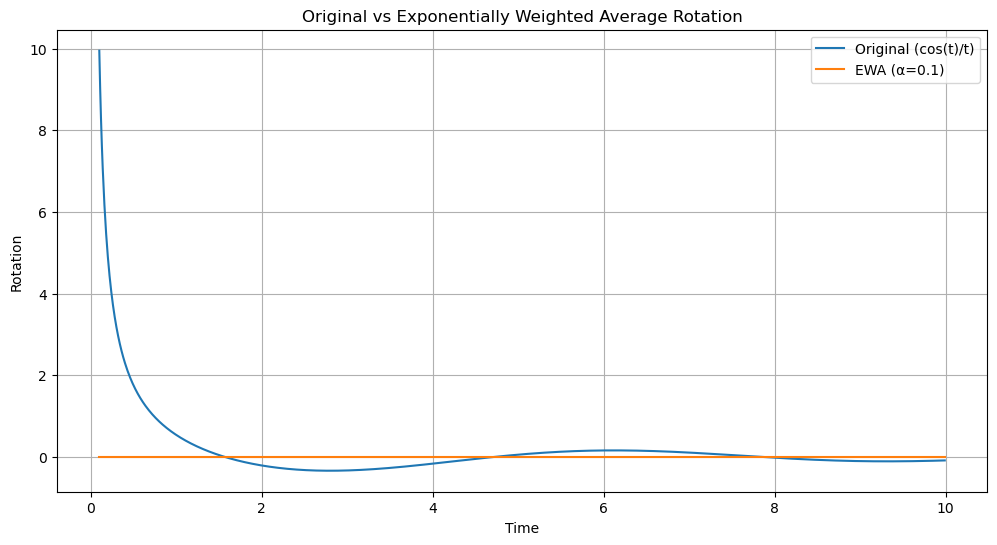

In [30]:
plot_comparison()